#Fully Connected Autoencoder

* Input  784-latent dimension of your choice - Output 784
* Just one hidden layer
* Sigmoid function after Output layer.
* Building this is just like MLP
* What is the effect of decreasing the size of latent dimension ?


#Download the dataset

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch
import torch.nn as nn
import torch.nn.functional as F


import torch.optim as optim
import numpy as np

from tqdm.autonotebook import tqdm
from itertools import chain
import matplotlib.pyplot as plt

In [1]:
batch_size = 256
image_dim=784


# dataset construction
transform = transforms.Compose([
    transforms.ToTensor(), # convert to tensor
    transforms.Lambda(lambda x: x.view(image_dim)) # flatten into vector
    ])

train_set = torchvision.datasets.MNIST(
    root='./data/MNIST'
    ,train=True
    ,download=True
    ,transform=transform
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)

9913344it [00:29, 336863.03it/s]                             


Extracting ./data/MNIST\MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\MNIST\raw



29696it [00:00, 29592314.47it/s]         


Extracting ./data/MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\MNIST\raw



1649664it [00:04, 356704.61it/s]                             


Extracting ./data/MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\MNIST\raw



5120it [00:00, 5151076.15it/s]          

Extracting ./data/MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\MNIST\raw



#Define the Fully Connected Autoencoder model

In [2]:
class Autoencoder(nn.Module):  #output size =  input size
  def __init__(self,image_dim,latent_dim):
    super(Autoencoder,self).__init__()
    self.layer_encode = nn.Linear(image_dim,latent_dim)
    self.layer_decode = nn.Linear(latent_dim,image_dim)

  def forward(self,x):

    encode = self.layer_encode(x)
    decode = self.layer_decode(encode)
    decode = torch.sigmoid(decode)

    return decode

# Training 

In [79]:
def trainingAutoencoder(data_loader,model,epochSize):
  
  model.train()  
  optimizer = optim.Adam(model.parameters(), lr=1e-3)

  losses = []

  # training loop
  for epoch in range(epochSize):
      trainloader = tqdm(data_loader)

      for i, data in enumerate(trainloader, 0):

          inputs, _ = data

          optimizer.zero_grad()

          outputs =  model(inputs)

          loss = F.binary_cross_entropy(outputs, inputs, reduction='sum') / inputs.shape[0]
          loss.backward()
          optimizer.step()

          losses.append(loss.item())

          trainloader.set_postfix(loss=np.mean(losses), epoch=epoch)
  
  return outputs
    
model =  Autoencoder(784,8)    
decoded_output = trainingAutoencoder(train_loader,model,10)

100%|██████████| 235/235 [00:09<00:00, 24.97it/s, epoch=9, loss=179]


In [14]:
decoded_output

tensor([[6.9077e-06, 2.7059e-06, 6.2914e-08,  ..., 2.7977e-06, 9.2963e-06,
         9.5341e-07],
        [4.3862e-04, 7.1548e-05, 3.3598e-05,  ..., 3.9010e-03, 4.8168e-05,
         4.3136e-04],
        [1.8022e-04, 7.8118e-05, 8.6438e-05,  ..., 1.3477e-03, 2.6090e-06,
         1.7816e-04],
        ...,
        [2.8199e-04, 4.0299e-04, 4.3434e-07,  ..., 8.3958e-06, 1.2498e-05,
         1.3053e-04],
        [1.2375e-06, 4.7014e-06, 8.0516e-06,  ..., 2.1588e-04, 1.0815e-06,
         1.6944e-05],
        [3.5310e-04, 5.2710e-05, 1.9253e-05,  ..., 7.3557e-05, 1.3411e-04,
         6.0124e-05]], grad_fn=<SigmoidBackward0>)

# Original image

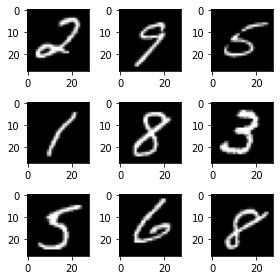

In [63]:
plt.figure(figsize=(4,4)) # specifying the overall grid size

with torch.no_grad():
    for i in range(9):
        images = train_set[-9 + i][0].numpy()
        images = images.reshape(28,28)

        plt.subplot(3,3,i+1)    # the number of images in the grid is 5*5 (25)
        plt.imshow(images,cmap=plt.get_cmap('gray'))

    plt.tight_layout()

# Reconstructed image 32 dim

In [74]:
def display_decoded(decoded_output):
    plt.figure(figsize=(4,4))
    with torch.no_grad():
        for i in range(9):
            images = decoded_output[-9 + i].numpy()
            images = images.reshape(28,28)
            plt.subplot(3,3,i+1)
            plt.imshow(images,cmap=plt.get_cmap('gray'))

        plt.tight_layout()

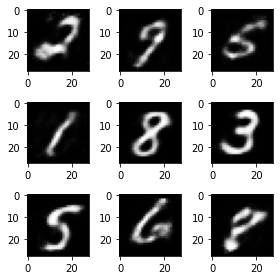

In [75]:
display_decoded(decoded_output)

# Task: Compare the reconstruced images for latent dimension of 32,16 and 8.

# Reconstructed image 16 dim

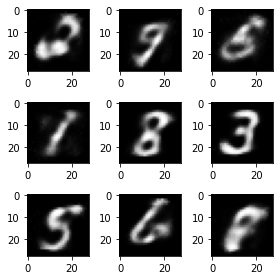

In [78]:
display_decoded(decoded_output)

# Reconstructed image 8 dim

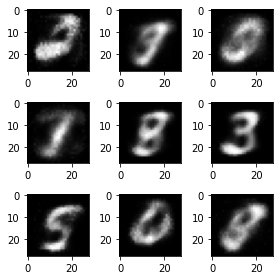

In [80]:
display_decoded(decoded_output)

# Evaluate model on training set?